In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time



In [5]:
# utility function: random tie breaking
def randmax(A):
    indices = [i for i in range(len(A)) if A[i]==np.max(A)]
    return np.random.choice(indices)


class Bernoulli_bandit:
    
    def __init__(self, mus):
        self.mus = mus
        self.max_mu = np.max(mus)
        self.n_arms = len(mus)
        
    def draw(self, arm):
        return(np.random.binomial(1, p=mus[arm]))

        
# run an alg on a bandit for T iterations and N_exp repetitions
def multiple_runs(bandit, alg, T, N_exp):
    np.random.seed()
    expected_regrets = np.zeros((N_exp, T))
    actual_regrets = np.zeros((N_exp, T))
    for n in range(N_exp):
        alg.refresh()
        expected_regret,actual_regret = alg.run()
        expected_regrets[n, :] = expected_regret
        actual_regrets[n, :] = actual_regret
        
    return (expected_regrets,actual_regrets)

class uniform_exploration:

    def __init__(self, mab, T):
        self.mab = mab
        self.T = T
        self.n_arms = mab.n_arms
        self.n_draws = np.zeros(self.n_arms)
        self.mu_hat = np.zeros(self.n_arms)
        
    def refresh(self):
        self.n_draws = np.zeros(self.n_arms)
        self.mu_hat = np.zeros(self.n_arms)
        
    def action(self):
        return np.random.randint(0,self.n_arms)

    def receive_reward(self,arm):
        reward = self.mab.draw(arm)
        self.mu_hat[arm] = (self.mu_hat[arm]*self.n_draws[arm] +reward)/(self.n_draws[arm]+1)
        self.n_draws[arm] = self.n_draws[arm] +1
        return(reward)

    def run(self):
        T = self.T
        max_mu = self.mab.max_mu
        mus = self.mab.mus
        expected_regret = np.zeros(T)
        actual_regret = np.zeros(T)

        for t in range(T):
            a_t = self.action()
            reward = self.receive_reward(a_t)
            expected_regret[t] = expected_regret[t-1]+max_mu-mus[a_t]
            actual_regret[t] = actual_regret[t-1]+max_mu-reward
            
        return(expected_regret,actual_regret)
            
        
        

class FTL:

    def __init__(self, mab, T):
        self.mab = mab
        self.T = T
        self.n_arms = mab.n_arms
        self.n_draws = np.zeros(self.n_arms)
        self.mu_hat = np.zeros(self.n_arms)
        
    def refresh(self):
        self.n_draws = np.zeros(self.n_arms)
        self.mu_hat = np.zeros(self.n_arms)
        
    def action(self):
        if (np.min(self.n_draws)==0):
            return randmax(-self.n_draws)
        else:
            return randmax(self.mu_hat)

    def receive_reward(self,arm):
        reward = self.mab.draw(arm)
        self.mu_hat[arm] = (self.mu_hat[arm]*self.n_draws[arm] +reward)/(self.n_draws[arm]+1)
        self.n_draws[arm] = self.n_draws[arm] +1
        return(reward)

    def run(self):
        T = self.T
        max_mu = self.mab.max_mu
        mus = self.mab.mus
        expected_regret = np.zeros(T)
        actual_regret = np.zeros(T)

        for t in range(T):
            a_t = self.action()
            reward = self.receive_reward(a_t)
            expected_regret[t] = expected_regret[t-1]+max_mu-mus[a_t]
            actual_regret[t] = actual_regret[t-1]+max_mu-reward
            
        return(expected_regret,actual_regret)
            
        
        
 

class UCB:

    def __init__(self, mab, T):
        self.mab = mab
        self.T = T
        self.n_arms = mab.n_arms
        self.n_draws = np.zeros(self.n_arms)
        self.mu_hat = np.zeros(self.n_arms)
        
    def refresh(self):
        self.n_draws = np.zeros(self.n_arms)
        self.mu_hat = np.zeros(self.n_arms)
        
    def action(self,t):
        if (np.min(self.n_draws)==0):
            return randmax(-self.n_draws)
        else:
            tmp = self.mu_hat + np.sqrt(2*np.log(t+1)/self.n_draws)
            return randmax(tmp)

    def receive_reward(self,arm):
        reward = self.mab.draw(arm)
        self.mu_hat[arm] = (self.mu_hat[arm]*self.n_draws[arm] +reward)/(self.n_draws[arm]+1)
        self.n_draws[arm] = self.n_draws[arm] +1
        return(reward)

    def run(self):
        T = self.T
        max_mu = self.mab.max_mu
        mus = self.mab.mus
        expected_regret = np.zeros(T)
        actual_regret = np.zeros(T)

        for t in range(T):
            a_t = self.action(t)
            reward = self.receive_reward(a_t)
            expected_regret[t] = expected_regret[t-1]+max_mu-mus[a_t]
            actual_regret[t] = actual_regret[t-1]+max_mu-reward
            
        return(expected_regret,actual_regret)

        
 

# set up the bandits and algs and plot the expected rewards for (a) & (b)

## (a)

In [6]:
N_exp = 500
T = 2000
mus = [0.4,0.6]
bandit = Bernoulli_bandit(mus)
ExpectedRegrets1 = []
ActualRegrets1 = []
alg_names = ['uniform', 'FTL', 'UCB']
colors = ['b','r','g']

alg1 = uniform_exploration(bandit, T)


expected_regrets,actual_regrets = multiple_runs(bandit, alg1, T, N_exp)
ExpectedRegrets1.append(expected_regrets)
ActualRegrets1.append(actual_regrets)


alg2 = FTL(bandit, T)

expected_regrets,actual_regrets = multiple_runs(bandit, alg2, T, N_exp)
ExpectedRegrets1.append(expected_regrets)
ActualRegrets1.append(actual_regrets)


alg3 = UCB(bandit, T)

expected_regrets,actual_regrets = multiple_runs(bandit, alg3, T, N_exp)
ExpectedRegrets1.append(expected_regrets)
ActualRegrets1.append(actual_regrets)

## (b)

In [7]:
N_exp = 500
T = 2000
mus = np.arange(0.05,1,0.05)
bandit = Bernoulli_bandit(mus)
ExpectedRegrets2 = []
ActualRegrets2 = []
alg_names = ['uniform', 'FTL', 'UCB']
colors = ['b','r','g']

alg1 = uniform_exploration(bandit, T)


expected_regrets,actual_regrets = multiple_runs(bandit, alg1, T, N_exp)
ExpectedRegrets2.append(expected_regrets)
ActualRegrets2.append(actual_regrets)


alg2 = FTL(bandit, T)

expected_regrets,actual_regrets = multiple_runs(bandit, alg2, T, N_exp)
ExpectedRegrets2.append(expected_regrets)
ActualRegrets2.append(actual_regrets)


alg3 = UCB(bandit, T)

expected_regrets,actual_regrets = multiple_runs(bandit, alg3, T, N_exp)
ExpectedRegrets2.append(expected_regrets)
ActualRegrets2.append(actual_regrets)

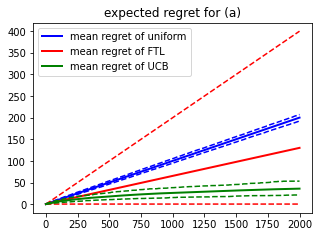

In [12]:
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

for i in range(len(alg_names)):
    ax.plot(np.arange(T), np.mean(ExpectedRegrets1[i], 0), linewidth=2.0, color=colors[i], label="mean regret of "+alg_names[i])
    ax.plot(np.arange(T), np.quantile(ExpectedRegrets1[i], 0.95, 0), np.arange(T), np.quantile(ExpectedRegrets1[i],0.05,0), linestyle="dashed", color=colors[i])
ax.legend()
ax.set_title('expected regret for (a)')

plt.show()

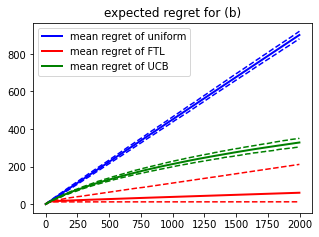

In [13]:
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

for i in range(len(alg_names)):
    ax.plot(np.arange(T), np.mean(ExpectedRegrets2[i], 0), linewidth=2.0, color=colors[i], label="mean regret of "+alg_names[i])
    ax.plot(np.arange(T), np.quantile(ExpectedRegrets2[i], 0.95, 0), np.arange(T), np.quantile(ExpectedRegrets2[i],0.05,0), linestyle="dashed", color=colors[i])
ax.legend()
ax.set_title('expected regret for (b)')

plt.show()

# if you are plotting the actual reward

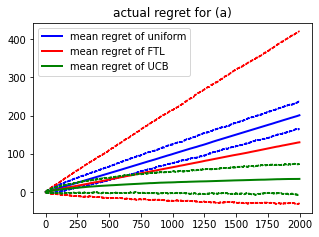

In [15]:
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

for i in range(len(alg_names)):
    ax.plot(np.arange(T), np.mean(ActualRegrets1[i], 0), linewidth=2.0, color=colors[i], label="mean regret of "+alg_names[i])
    ax.plot(np.arange(T), np.quantile(ActualRegrets1[i], 0.95, 0), np.arange(T), np.quantile(ActualRegrets1[i],0.05,0), linestyle="dashed", color=colors[i])
ax.legend()
ax.set_title('actual regret for (a)')
plt.show()

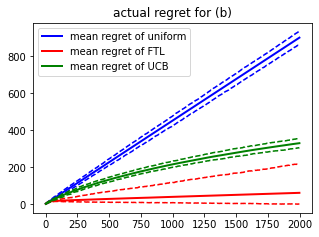

In [14]:
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

for i in range(len(alg_names)):
    ax.plot(np.arange(T), np.mean(ActualRegrets2[i], 0), linewidth=2.0, color=colors[i], label="mean regret of "+alg_names[i])
    ax.plot(np.arange(T), np.quantile(ActualRegrets2[i], 0.95, 0), np.arange(T), np.quantile(ActualRegrets2[i],0.05,0), linestyle="dashed", color=colors[i])
ax.legend()
ax.set_title('actual regret for (b)')

plt.show()